# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 100  </p>
## <p style="text-align: center;">Due: October 16th(10/16/2020) submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)*

For the descriptive questions, you can write down the solution in paper and embed a picture of it to the notebook or type it out.

# Question 1 - Stochastic Gradient Descent (25 pts)
 1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: 
$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ 


 2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD. (2pts) Report the MSE at the end of 15 epochs for the two best combinations.


## Answer 

### 1.

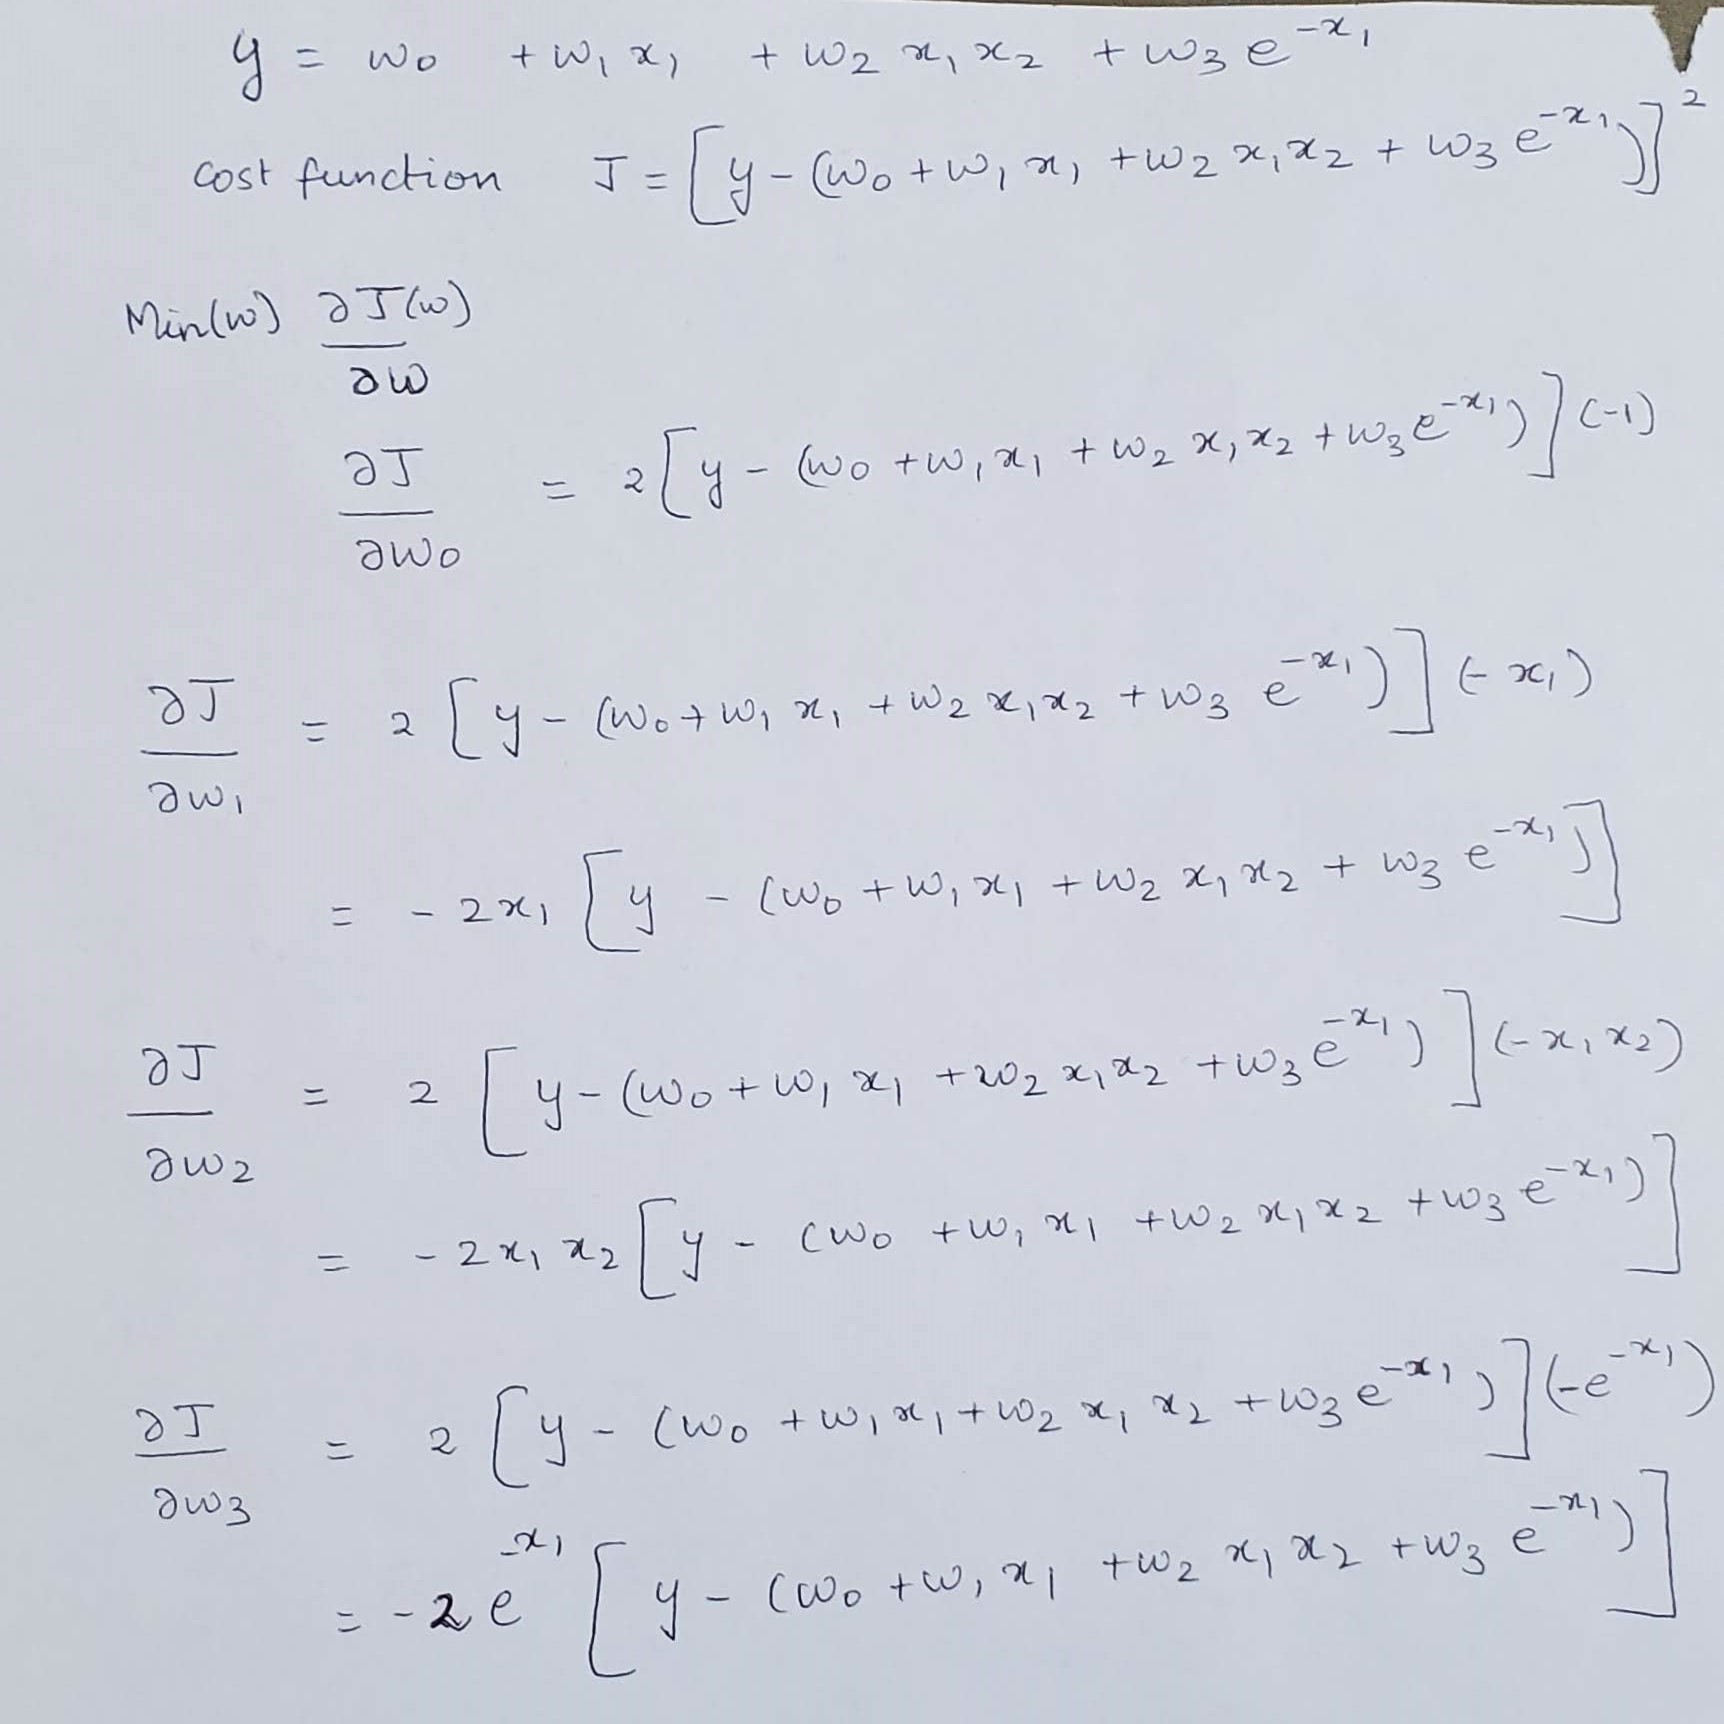

### 2.

In [66]:
import os # Point to data directory file
os.chdir("C:/Users/Acer/Desktop/Nisha/Nisha Career/PhD/Coursework/Fall 2020/Homework Assignments/HW3/")

### Using SGD


In [67]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
        
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros((1, 4),dtype=np.float64, order="C")
        
    def sgd(self, gradient):
        #print('Initial coef')
        #print(self.coef)
        self.coef=self.coef-self.learning_rate*gradient # = please fill this to update self.coef using SGD
        #print('Updated coef')
        #print(self.coef.flatten())
    
        
    def fit(self, X, y, plot=False):
        mse = []
        coefs = []
        coeffdf=pd.DataFrame(columns = ['w0', 'w1', 'w2', 'w3'],index = range(self.n_epoch))
        #print('inside fit', update_rule)
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                #Compute error
                error=y-np.dot(self.coef,X[i,:])
                #print(error)
                # Compute gradients
                gradient=-2*X[i,:]*error[i]+2*self.regularization*self.coef# Ridge regression gradient
                #gradient1=-2*X[i,1]*error
                #gradient2=-2*X[i,2]*error
                #gradient3=-2*X[i,3]*error
                # Update weights
                #print('In Iteration ',i, ' gradient is ',gradient)
                self.sgd(gradient)

            coefs.append(self.coef)
            #print('My coeffdf b4', coeffdf)
            coeffdf.loc[epoch]=self.coef.flatten()
            #print('My coeffdf aftr \n', coeffdf)
            #print('In epoch ',epoch, ' coefs are ',coefs)
            residuals = y - self.linearPredict(X) 
            #print('In epoch ',epoch, ' residuals are ',residuals)
            mse.append(np.mean(residuals**2))
            #print('MSE appended value :', mse)
        self.lowest_mse = mse[-1]
        print('-------------------------------------------------------------------------------------------------------')
        print('MSE values over 15 epochs with regularization parameter value ',self.regularization, 'and learning rate', self.learning_rate,' is :\n', mse)
        print('*******************************************************************************************************')
        print('Lowest_mse value - at end of 15 epochs : ', mse[-1])
        
        if plot == True:
            plt.figure(figsize=(10,8))
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure(figsize=(10,8))
            plt.plot(range(self.n_epoch),coeffdf['w0'],label='w0')
            plt.plot(range(self.n_epoch),coeffdf['w1'],label='w1')
            plt.plot(range(self.n_epoch),coeffdf['w2'],label='w2')
            plt.plot(range(self.n_epoch),coeffdf['w3'],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        yhat=np.dot(X,np.array(self.coef).T) #compute dot product of self.coef and X  
        #print('Inside Linear predict', yhat)
        #print(self.coef)
        return yhat.flatten()        

In [68]:
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [69]:
for lr in range(len(learning_rate)):
    #print(learning_rate[lr])
    for reg in range(len(regularization)):
        #print(regularization[reg])
        test=Regression(learning_rate=learning_rate[lr],regularization=regularization[reg],n_epoch=15)
        test.fit(X,y)
        #test.get_features(X)

-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  0 and learning rate 0  is :
 [0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703]
*******************************************************************************************************
Lowest_mse value - at end of 15 epochs :  0.06473070746881703
-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  10 and learning rate 0  is :
 [0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703, 0.06473070746881703

-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  0 and learning rate 0.1  is :
 [0.035174637278479096, 0.035184738384684805, 0.03517404201532685, 0.035163516623378785, 0.035153287036251556, 0.035143344898319884, 0.035133681328890345, 0.03512428774941278, 0.0351151558769436, 0.03510627771282645, 0.035097645531813874, 0.03508925187164238, 0.035081089523040905, 0.03507315152015373, 0.035065431131359466]
*******************************************************************************************************
Lowest_mse value - at end of 15 epochs :  0.035065431131359466


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in square
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in add
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract


-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  10 and learning rate 0.1  is :
 [4.835175339862768e+137, 5.4780803635253965e+277, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
*******************************************************************************************************
Lowest_mse value - at end of 15 epochs :  nan


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in multiply


-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  100 and learning rate 0.1  is :
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
*******************************************************************************************************
Lowest_mse value - at end of 15 epochs :  nan


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply


-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  0 and learning rate 1  is :
 [inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
*******************************************************************************************************
Lowest_mse value - at end of 15 epochs :  nan
-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  10 and learning rate 1  is :
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
*******************************************************************************************************
Lowest_mse value - at end of 15 epochs :  nan
-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization param

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply


-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  0 and learning rate 10  is :
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
*******************************************************************************************************
Lowest_mse value - at end of 15 epochs :  nan
-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  10 and learning rate 10  is :
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
*******************************************************************************************************
Lowest_mse value - at end of 15 epochs :  nan
-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization par

**MSE for best 2 combinations of learning parameter and regularization parameter are given below along with the plots**

It seems like the MSE is best learnt with a learning rate of 0.01 as we can see in the below MSE vs Epoch plots. 
Here the learning of parameters is fast enough as shown by the decline in the slope within the first few epochs while the learning with 0.001 is slower to reach the same MSE value
-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  0 and learning rate 0.01  is :
 [0.02980156143413799, 0.028293764921859543, 0.027755012300616777, 0.02755637978324925, 0.02748362182336817, 0.027457504869523988, 0.027448479067225265, 0.02744557302514355, 0.02744476450031538, 0.027444613447885794, 0.027444626596437555, 0.02744464957083089, 0.027444644021153403, 0.02744460786620497, 0.027444548002430152]
*******************************************************************************************************
Lowest_mse value - at end of 15 epochs :  0.027444548002430152


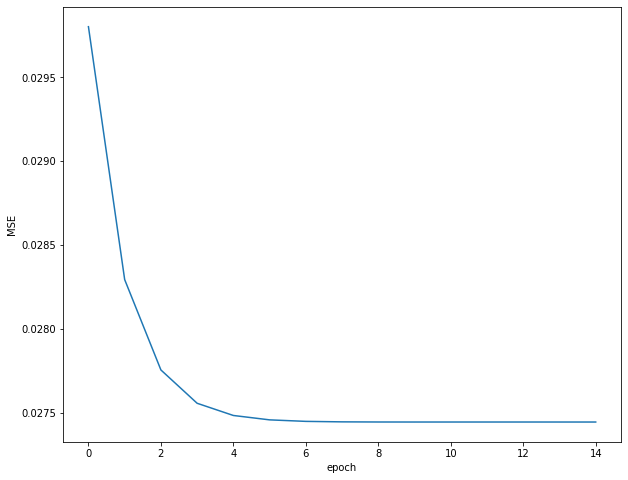

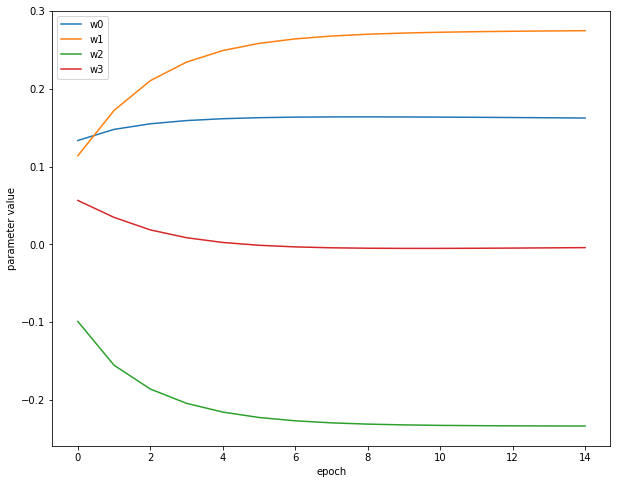

In [70]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd("**MSE for best 2 combinations of learning parameter and regularization parameter are given below along with the plots**")
print('It seems like the MSE is best learnt with a learning rate of 0.01 as we can see in the below MSE vs Epoch plots. \n\
Here the learning of parameters is fast enough as shown by the decline in the slope within the first few epochs \
while the learning with 0.001 is slower to reach the same MSE value')

test0=Regression(learning_rate=0.01,regularization=0,n_epoch=15)
test0.fit(X,y,plot=True)

-------------------------------------------------------------------------------------------------------
MSE values over 15 epochs with regularization parameter value  0 and learning rate 0.001  is :
 [0.03541866607374716, 0.03374499599448491, 0.032838515997632094, 0.03212726307517442, 0.031553718138102864, 0.031080664384079724, 0.030682259717941945, 0.030340747989089648, 0.03004380606283104, 0.02978272491239339, 0.02955120940021993, 0.029344591337361763, 0.02915931287825788, 0.028992586090204973, 0.02884216736225418]
*******************************************************************************************************
Lowest_mse value - at end of 15 epochs :  0.02884216736225418


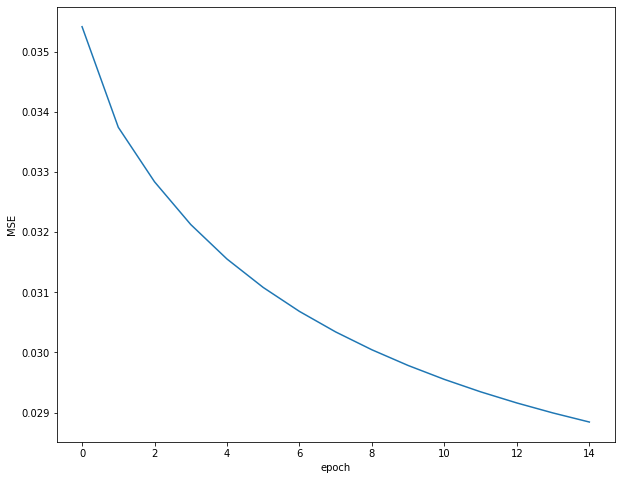

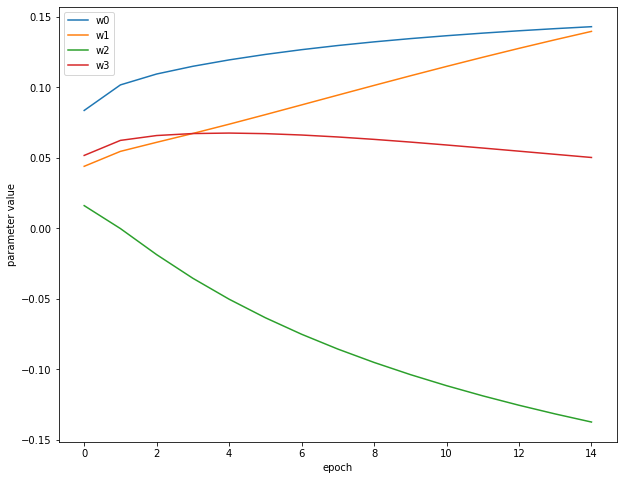

In [71]:
test1=Regression(learning_rate=0.001,regularization=0,n_epoch=15)
test1.fit(X,y,plot=True)

# Question 2 - MLP Regressor(15 pts) 

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python; http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

The following code will pre-process the data and split the data into training and test sets using train_test_split with random state 30 and test_size = 0.25.

The dataset is loaded from q2_data.csv which contains features of engine and the predictor varialble is "mpg". The features are:
* cylinders 
* displacement
* horsepower
* weight
* acceleration

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
import math
%matplotlib inline


df = pd.read_csv('q2_data.csv') 
df.dropna(inplace=True)
df.columns
y = df['mpg'].values
X = df.drop(['mpg'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(294, 5) (294,) (98, 5) (98,)



We also want to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.



   
1) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler) for the different number of hidden units.

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)*

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42, batch_size= 20,       learning_rate_init = 0.005
    
   Which of the three models ((a)-(c)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


2) (**5pts**) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using the following three conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*:

   (a) *hidden_layer_sizes = (5,)* 
   
   (b) *hidden_layer_sizes = (15,)*
   
   (c) *hidden_layer_sizes = (50,)* 

   
3) (**5pts**) Now, use the parameters for MLP Regressor as below to train a MLPRegressor models on the entire training set for different batch size. 

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,learning_rate_init = 0.005 , hidden_layer_sizes = (15,)
   
   Plot three different figures for the three batch size, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_*: 

   (a) *batch_size = 1* 
   
   (b) *batch_size = 20*  
   
   (c) *batch_size = 2000* 
     
   **Compare the three plots obtained comment on the gradient updates. What do you understand about the difference between batch_size = 1, 20 and 2000.**

## Answer 

### 1.

In [73]:
# Scaling the data
X_scaler = StandardScaler()
X_trn_scaled = X_scaler.fit_transform(X_train)
#print(X_scaler.mean_)
X_tst_scaled = X_scaler.transform(X_test)

# Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with 
# no activation function in the output layer, which can also be seen as using the identity function as
# activation function. Therefore, it uses the square error as the loss function.
mlp1 = MLPRegressor(hidden_layer_sizes = (5,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size= 20, learning_rate_init = 0.005)
mlp1.fit(X_trn_scaled, y_train)
predict_train=mlp1.predict(X_trn_scaled)
#print('MSE training : {:.5f}'.format(mean_squared_error(y_train, predict_train)))
print('--------------- Training data metrics -----------------')
print('RMSE score value for MLP1 is : ',mlp1.loss_*2) 
#Multiply by 2 as the definition of NN_base.py loss is MS*0.5 
#Details here https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/neural_network/_base.py
print('R^2 value for MLP1 is - ',mlp1.score(X_trn_scaled, y_train))

#mlp1.fit(X_tst_scaled, y_test)
print('--------------- Testing data metrics -----------------')
print('RMSE score value for MLP1 is : ',math.sqrt(mlp1.loss_*2))
print('R^2 value for MLP1 is - ',mlp1.score(X_tst_scaled, y_test))

mlp2 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size= 20, learning_rate_init = 0.005)
mlp2.fit(X_trn_scaled, y_train)
print('--------------- Training data metrics -----------------')
print('RMSE score value for MLP2 is : ',math.sqrt(mlp2.loss_*2))
print('R^2 value for MLP2 is - ',mlp2.score(X_trn_scaled, y_train))

#mlp2.fit(X_tst_scaled, y_test)
print('--------------- Testing data metrics -----------------')
print('RMSE score value for MLP2 is : ',math.sqrt(mlp2.loss_*2))
print('R^2 value for MLP2 is - ',mlp2.score(X_tst_scaled, y_test))

mlp3 = MLPRegressor(hidden_layer_sizes = (50,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size= 20, learning_rate_init = 0.005)
mlp3.fit(X_trn_scaled, y_train)
print('--------------- Training data metrics -----------------')
print('RMSE score value for MLP3 is : ',math.sqrt(mlp3.loss_*2))
print('R^2 value for MLP3 is - ',mlp3.score(X_trn_scaled, y_train))

#mlp3.fit(X_tst_scaled, y_test)
print('--------------- Testing data metrics -----------------')
print('RMSE score value for MLP3 is : ',math.sqrt(mlp3.loss_*2))
print('R^2 value for MLP3 is - ',mlp3.score(X_tst_scaled, y_test))

from IPython.display import HTML as html_print

def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

str='As we can see from the RMSE metric and R^2 metric as the number of hidden units in the layer increase the RMSE decreases. '\
+'However for model c with 50 neurons seems to perform the best when we consider both training and test error. '\
+'That is even though the training error for model c is slightly higher than model b, the test error for model c is close '\
+'to training error in c as opposed to that of model b. In all I would conclude model c does the best with least RMSE in '\
+'both training and test error and R^2 metric closely followed by model b'
html_print(cstr(str,color='Magenta'))

--------------- Training data metrics -----------------
RMSE score value for MLP1 is :  11.830467551600284
R^2 value for MLP1 is -  0.811006522456962
--------------- Testing data metrics -----------------
RMSE score value for MLP1 is :  3.4395446721332585
R^2 value for MLP1 is -  0.6375217289063678
--------------- Training data metrics -----------------
RMSE score value for MLP2 is :  3.0517919848116732
R^2 value for MLP2 is -  0.8473405147609729
--------------- Testing data metrics -----------------
RMSE score value for MLP2 is :  3.0517919848116732
R^2 value for MLP2 is -  0.6738365759309741
--------------- Training data metrics -----------------
RMSE score value for MLP3 is :  3.1244147412460426
R^2 value for MLP3 is -  0.8552180609842106
--------------- Testing data metrics -----------------
RMSE score value for MLP3 is :  3.1244147412460426
R^2 value for MLP3 is -  0.6414008521109671


### 2.

Text(0, 0.5, 'Squared root of Loss_Curve_')

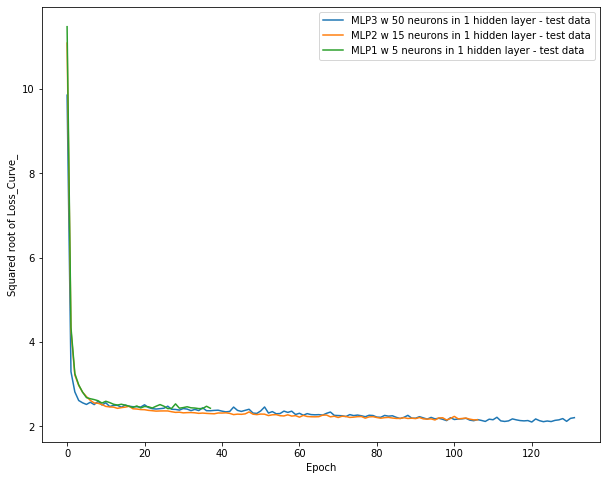

In [74]:
tst_mlp1_lc=np.sqrt(mlp1.loss_curve_)
tst_mlp2_lc=np.sqrt(mlp2.loss_curve_)
tst_mlp3_lc=np.sqrt(mlp3.loss_curve_)
plt.figure(figsize=(10,8))
plt.plot(range(len(tst_mlp3_lc)),(tst_mlp3_lc),label='MLP3 w 50 neurons in 1 hidden layer - test data')
plt.plot(range(len(tst_mlp2_lc)),(tst_mlp2_lc),label='MLP2 w 15 neurons in 1 hidden layer - test data')
plt.plot(range(len(tst_mlp1_lc)),(tst_mlp1_lc),label='MLP1 w 5 neurons in 1 hidden layer - test data')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Squared root of Loss_Curve_')

### 3.

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:352: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


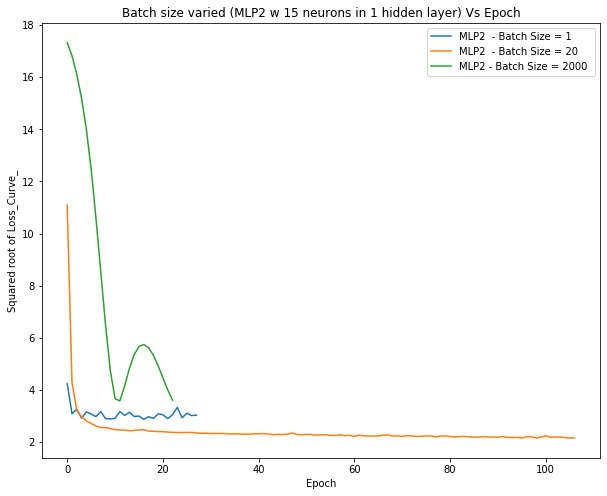

In [75]:
mlp2_bs1 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size= 1, learning_rate_init = 0.005)
mlp2_bs1.fit(X_trn_scaled, y_train)

mlp2_bs20 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size= 20, learning_rate_init = 0.005)
mlp2_bs20.fit(X_trn_scaled, y_train)

mlp2_bs2000 = MLPRegressor(hidden_layer_sizes = (15,), activation = 'tanh', solver = 'sgd', learning_rate='constant', 
                    random_state=42, batch_size= 2000, learning_rate_init = 0.005)
mlp2_bs2000.fit(X_trn_scaled, y_train)

tst_mlp2_bs1=np.sqrt(mlp2_bs1.loss_curve_)
tst_mlp2_bs20=np.sqrt(mlp2_bs20.loss_curve_)
tst_mlp2_bs2000=np.sqrt(mlp2_bs2000.loss_curve_)
plt.figure(figsize=(10,8))
plt.title('Batch size varied (MLP2 w 15 neurons in 1 hidden layer) Vs Epoch' )
plt.plot(range(len(tst_mlp2_bs1)),(tst_mlp2_bs1),label='MLP2  - Batch Size = 1  ')
plt.plot(range(len(tst_mlp2_bs20)),(tst_mlp2_bs20),label='MLP2  - Batch Size = 20 ')
plt.plot(range(len(tst_mlp2_bs2000)),(tst_mlp2_bs2000),label='MLP2 - Batch Size = 2000 ')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Squared root of Loss_Curve_')

from IPython.display import HTML as html_print

def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

str='As we can see from the below plots, when batch size is small i.e., 1 or very large i.e., 2000 '\
+'there is not many epochs needed for convergence or in other words the gradient is steep and coming down fast enough '\
+'in the right direction of the minima. '\
+'And also the RMSE is probably a local minima rather '\
+'than a global minima with batchsize of 20. However when we use 20 the starting RMSE loss is not too high or '\
+'too low and it   '\
+'seems to converge fast enough to a good RMSE loss as well.'\
+'If the batch size is the entire dataset, the learning will be slower than if the batch size is some intermediate '\
+'value between 1 and the entire data set. This is because, per epoch, the intermediate value will update itself more'\
+'times, than using the entire dataset, which updates itself only once per epoch. If the batch size is 1, on the other'\
+'hand, the learning is more random, and might take more time to converge as well.'\
+' In all an optimum batch size value in relation to '\
+'the number of training data we have is needed to achieve or come close to a global minima of our function.'
html_print(cstr(str,color='Magenta'))

# Question 3: Tensor Playground (15 points)
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top right (alternate colored squares).

Use these settings as the DEFAULT settings for all subquestions: test/training ratio = 50%, Noise = 0, Batch Size = 30, learning rate = 0.03, activation = tanh, one hidden layer with 2 neurons, input as $X_1$, $X_2$ and no Regularization.

1) Use the DEFAULT setting and run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? Why? (4 pts)

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) Effect of number of hidden units: Go back to DEFAULT settings and report the train, test losses at the end of 1000 epochs for 4 and 8 neurons in the hidden layer (2 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? (4 pts)

3) Effect of learning rate and number of epochs: Go back to DEFAULT settings and set the activation to be Relu and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. (4 pts)

4) Go back to DEFAULT settings. Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. (3 pts)

## Answer 

### 1.
Tanh activation
Test Loss : 0.159, Train loss - 0.160

Linear activation
Test Loss : 0.505, Train loss - 0.492

We see that the linear activation function leads to a linear boundary and thus cant seem to separate the data as well as a nonlinear activation function as indicated by the loss values as well.

### 2.
**4 Neurons**
Test Loss - 0.029, Train loss - 0.009 

**8 Neurons**
Test Loss - 0.035, Train loss - 0.006

As the number of neurons increase, the boundary becomes very non linear and is fitted almost perfectly to train data as can be seen from the reductions in train and slight increase in test loss from 4 neurons to 8 neurons in a hidden layer.

### 3.
**100 Epochs**

Learning rate =10.00; Test Loss - 0.624, Train loss - 0.712

Learning rate =0.100; Test Loss - 0.154, Train loss - 0.167

Learning rate =0.010; Test Loss - 0.123, Train loss - 0.092 

Learning rate =0.001; Test Loss - 0.355, Train loss - 0.324 

**1000 epochs**

Learning rate =10.00; Test Loss - 0.620, Train loss - 0.712

Learning rate =0.100; Test Loss - 0.152, Train loss - 0.166 

Learning rate =0.010; Test Loss - 0.029, Train loss - 0.009 

Learning rate =0.001; Test Loss - 0.096, Train loss - 0.095

As we can see with a high learning rate of 10, the number of epochs doesn't make a difference in reducing the error. But with a learning rate of 0.010 and 0.001, the number of epochs helps in reducing the training error to almost 0 due to overfitting in a way. We can also see that with a smaller learning rate, we need more epochs to achieve the same loss as the one with a slightly higher learning rate with lesser epochs (100 epochs LR of 0.010 Vs 1000 epochs of LR 0.001).

In all, we need a reasonable learning rate and no. of epochs to find the best model fit to given data. Best is to have a low learning rate 0.01 or so and have minimum no. of epochs as 1000 for this data to avoid overfitting on training data and have reasonable loss in test data.

### 4. 

The data is clearly a division of the quadrants of the cartesian plane. The best hyperparameter input to modify is the addition of X1X2 because this is negative or positive where most appropriate. Adding more epochs gets a better error.


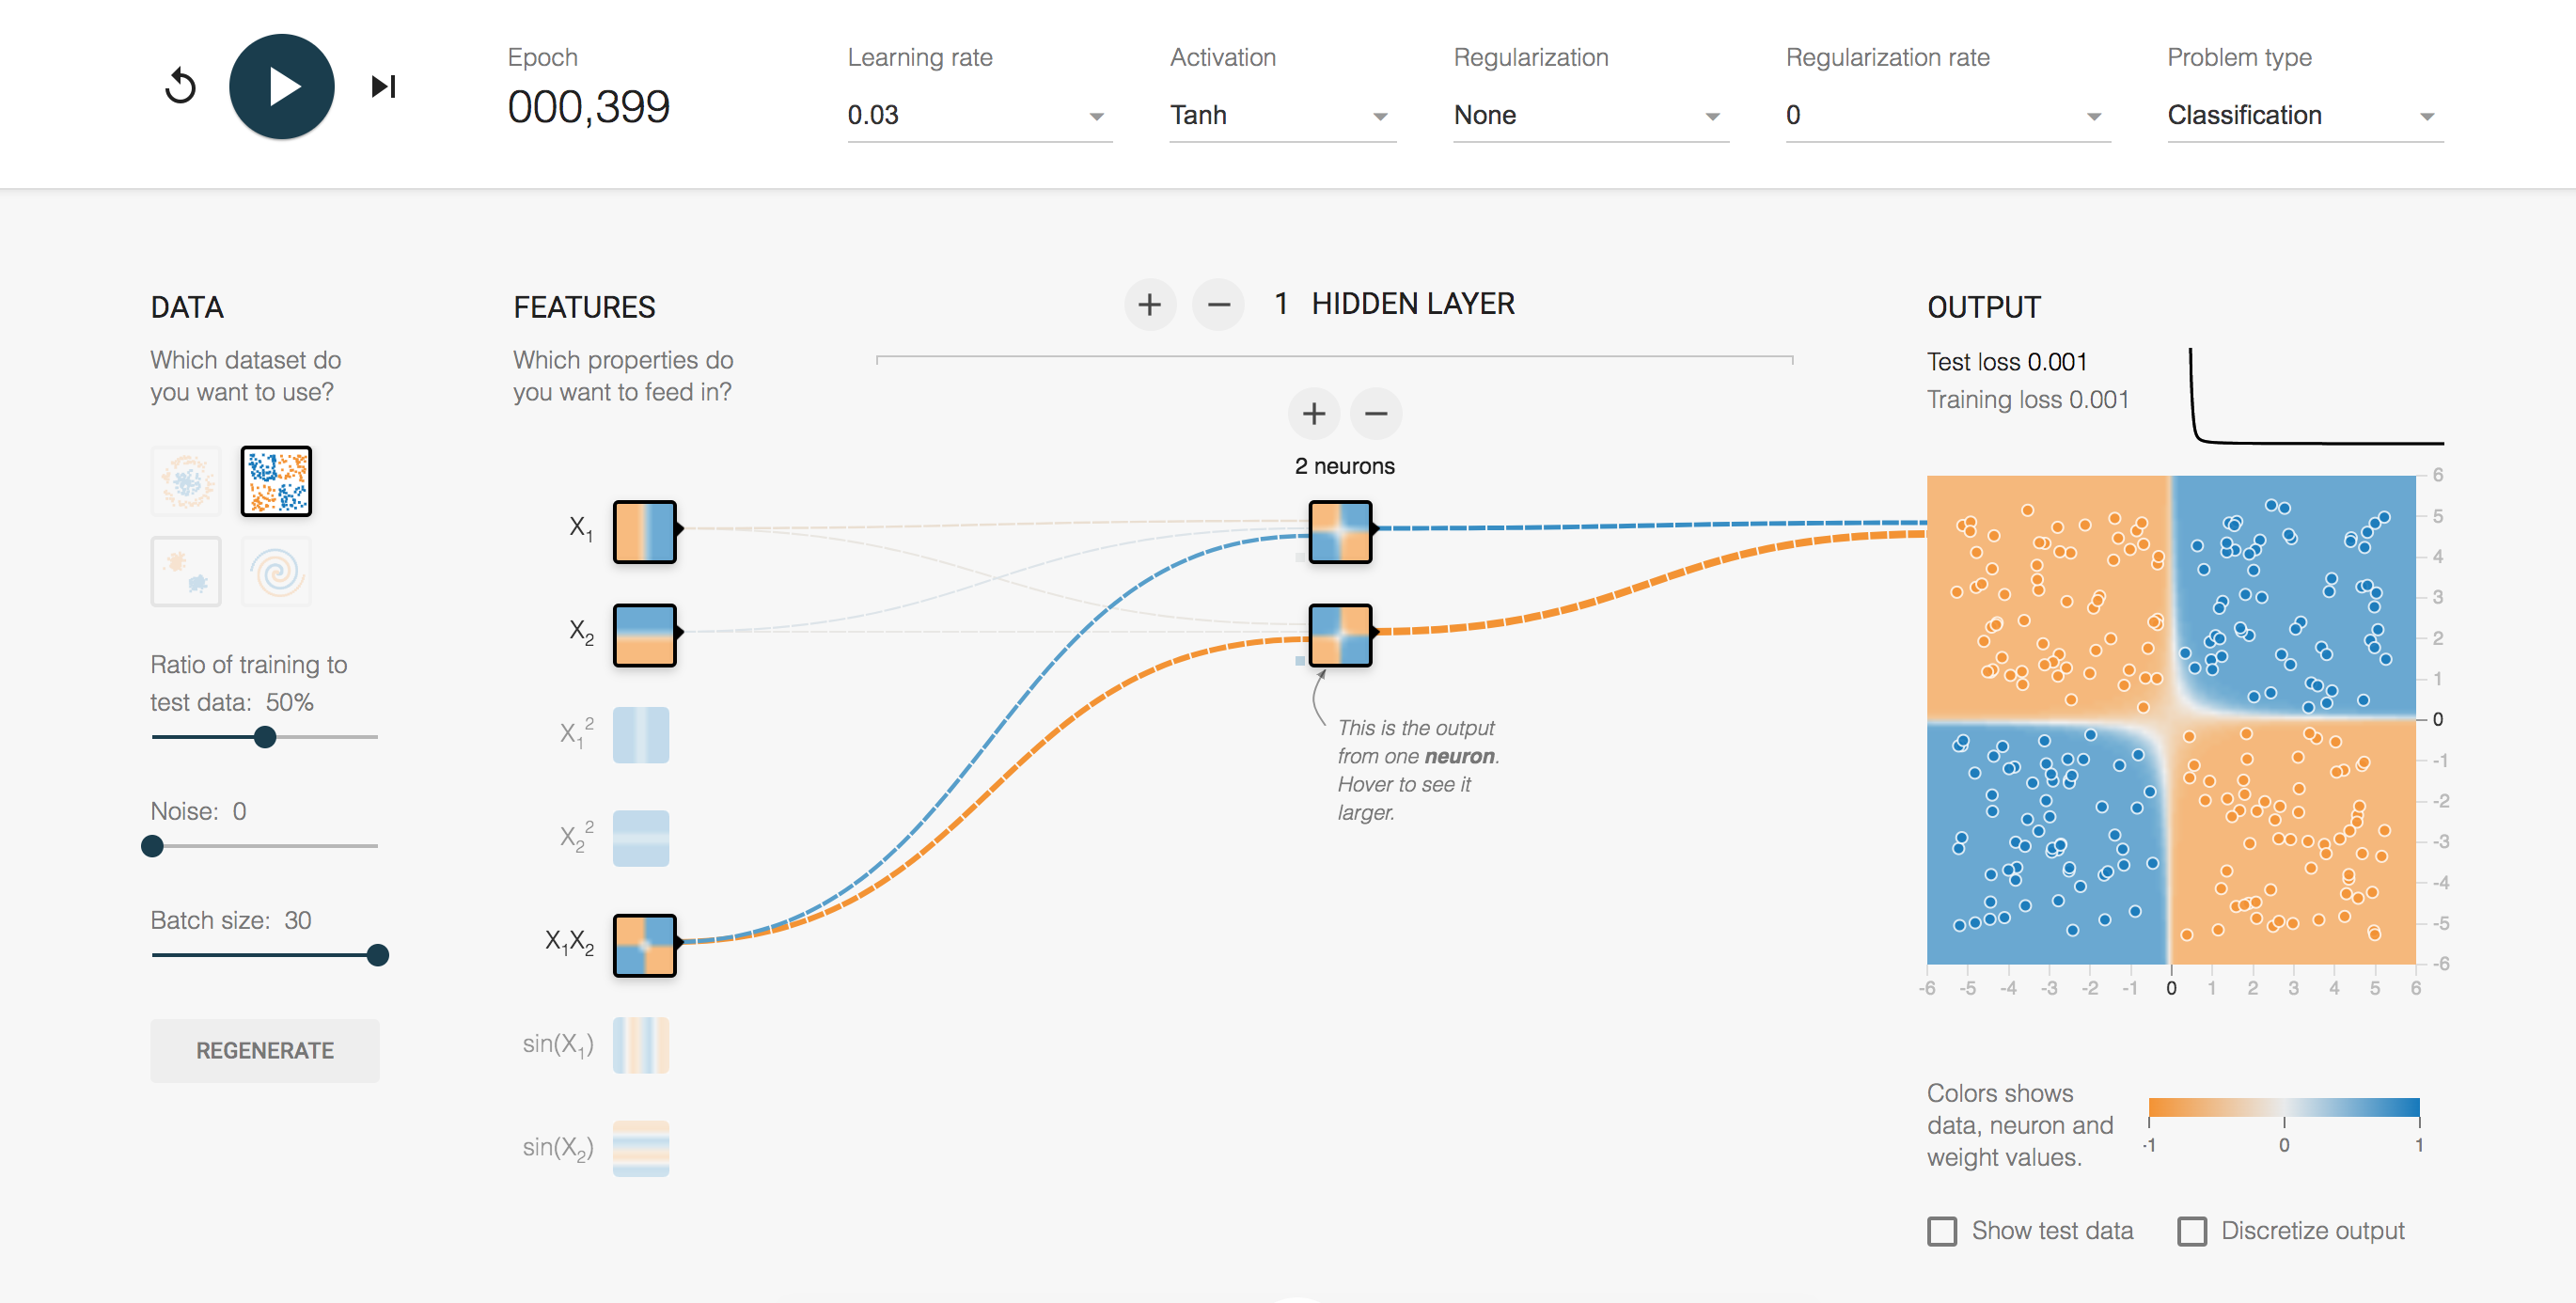

In [76]:
from IPython.display import Image
Image(filename='HW3Q3_4.png')

# Question 4 - Feature Selection (20 pts)

In this question, we will explore the importance of feature selection, You can use the below code to load the dataset "zoo.csv". This dataset contains a set of features for different animals and the output is class_type 
corresponding to the features. The details of class_type is present in class.csv for your reference.

1. Plot the correlation matrix. The resulting correlation plot should be (n_features * n_features) matrix. List the top 5 most positively correlated features with class_type. (**3pts**)

2. List the top 5 most negatively correlated features with class_type. (**3pts**)

3. Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE to perform feature selection with estimator = LogisticRegression(max_iter=1000) estimator. List the top 5 features selected from RFE.(**2pts**)

* Create a train_test split of 80:20(train:test) with random state = 50

* We need to use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.

4. Train a MLP Regressor with train data and report the ${R^2}$ score on the test set for each of the following, 

   a) Model trained with top 5 most positvely correlated features from part 1
   
   b) Model trained with top 5 most negatively correlated features from part 2
   
   c) Model trained with five features selected by RFE from part 3
   
   d) Finally train a MLP Regressor on the entire training data with the entire orignal features.Use the default values for MLPRegressor as below(**8pts**)

    MLPRegressor(max_iter = 1000,random_state=1)

5. Explain your results based on your understanding of feature selection and the ${R^2}$ score.  (**4pts**) 

In [77]:
df = pd.read_csv("zoo.csv")
df.columns
y = df['class_type'].values
for i in np.arange(np.shape(y)[0]):
    if y[i] in [1,2,3,4,5]:
        y[i] = 1
    else:
        y[i]=0
df['class_type']=y
X = df.drop(['class_type','animal_name'], axis = 1)

In [78]:
class_df = pd.read_csv("class.csv")
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,0
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [79]:
df.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [80]:
df.drop(['animal_name'], axis = 1, inplace=True)
df['class_type']=y

In [81]:
df.head(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Answer 

### 1. and 2.

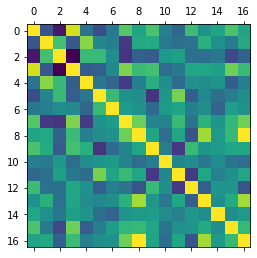

Five most correlated values are 
 backbone    1.000000
tail        0.731762
toothed     0.575085
milk        0.384958
catsize     0.356976
Name: class_type, dtype: float64
Five most negatively correlated values are 
 legs       -0.432856
eggs       -0.340420
venomous   -0.246611
airborne   -0.104718
aquatic     0.022463
Name: class_type, dtype: float64


In [82]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

print("Five most correlated values are \n",df.corr()[:]['class_type'].sort_values(ascending=False)[1:6])
pos5=df.corr()[:]['class_type'].sort_values(ascending=False)[1:6].index.ravel()
pos_5 = []
#print(X.columns)
for i in pos5:
    pos_5.append(X.columns.get_loc(i))
#print(pos_5)

print("Five most negatively correlated values are \n",df.corr()[:]['class_type'].sort_values()[0:5])
neg5=df.corr()[:]['class_type'].sort_values()[0:5].index.ravel()
neg_5=[]
for i in neg5:
    neg_5.append(X.columns.get_loc(i))
#print(neg_5)

### 3.

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
selector = RFE(estimator = LogisticRegression(max_iter=1000), n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_
print("5 top features are ")
for i in X.columns[selector.support_]: print(i)
rfe_5=[]
for i in X.columns[selector.support_]:
    rfe_5.append(X.columns.get_loc(i))
#print(rfe_5)

5 top features are 
feathers
milk
toothed
backbone
tail


### 4. 5. and 6.

In [84]:
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

#MLPRegressor(max_iter = 1000,random_state=1)
regr_5pos = MLPRegressor(max_iter = 1000,random_state=1)
regr_5neg = MLPRegressor(max_iter = 1000,random_state=1)
regr_5rfe = MLPRegressor(max_iter = 1000,random_state=1)
regr_all = MLPRegressor(max_iter = 1000,random_state=1)


print(pos_5)

regr_5pos.fit(X_train[:,pos_5],y_train) 
regr_5neg.fit(X_train[:,neg_5],y_train)
regr_5rfe.fit(X_train[:,rfe_5],y_train)
regr_all.fit(X_train,y_train)

print("R2 of 5 most corr. of part a is ", regr_5pos.score(X_test[:,pos_5],y_test))
print("R2 of 5 most neg corr. test is ",regr_5neg.score(X_test[:,neg_5],y_test))
print("R2 of 5 RFE on test is " , regr_5rfe.score(X_test[:,rfe_5],y_test))
print("R2 of all dataset  on test is ",regr_all.score(X_test,y_test))


[8, 13, 7, 3, 15]
R2 of 5 most corr. of part a is  0.9328208871876462
R2 of 5 most neg corr. test is  0.7875978696635864
R2 of 5 RFE on test is  0.9986151075637504
R2 of all dataset  on test is  0.9506742986075811


### 7.

The reason the regression works better with 5 features selected with RFE than with all the features probably has to do with the curse of dimensionality, where the higher the dimension of the input space is, the harder it is for the regression algorithm to find the correct answer.

R^2 is not very bad when we use all the features. Although selecting positively correlated features or performing an RFE does a really good job even with the testing dataset rather than have all features. This implies that the MLP has fitted the training data very well up to a close 100% with just 5 features. The feature selection methods by looking at positive or negative correlations or using RFE, we are limiting the no. of features to 5 so we are able to create a non linear model that is a perfect fit to the given data and it helps with explainability to an audience as well rather than trying to figure out how the 16 different features could be interacting in the MLP model. For explainability, it is better to use selected features and then perform the MLP. That way the explainability of the model is much better than the MLP with all features. Also negatively correlated features in this case might not be the best set of features for the model to predict the class_type.

# Question 5 (Data Pre-processing - 25pts)
The following dataset contains House Sales data in King County, USA. This dataset contains house sale prices for King County, which includes Seattle. This dataset contains the following columns:

* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: Square footage of the home
* sqft_lot: Square footage of the lot
* floors: Total floors (levels) in house
* waterfront: House which has a view to a waterfront (0/1)
* view: Has been viewed (0-4)
* condition: How good the condition is Overall (1-5)
* grade: Overall grade given to the housing unit, based on King County grading system (1-13)
* sqft_above: Square footage of house apart from basement
* sqft_basement: Square footage of the basement
* yr_built: Built Year
* yr_renovated: Year when house was renovated
* zipcode: Zip code
* price: Selling price of house

Here, price is the dependent variable while all other variables are assumed to be independent variables. Here, 10% cells of most columns in the dataset contain NaN value.

In [85]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(100)

df = pd.read_csv("kc_house_data.csv")
age = df['yr_renovated']
built = df['yr_built']
df.iloc[:, :-1] = df[:-1].mask(np.random.random(df[:-1].shape)<0.1)
df['yr_renovated'] = age
df['yr_built'] = built
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,0,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0,98074.0,510000.0


## Answer 

### Question 5.1 (5 points)
Print the number of NaN values in each column. Next, if the value of yr_renovated is equal to 0, set it equal to the corresponding value of yr_built.



In [86]:
#print(df.describe()) # Here the Count row shows the no. of values in the column without NaNs
print('Number NaN values in each column :')
df.isnull().sum(axis = 0)

Number NaN values in each column :


bedrooms         2150
bathrooms        2150
sqft_living      2170
sqft_lot         2091
floors           2152
waterfront       2179
view             2184
condition        2096
grade            2135
sqft_above       2163
sqft_basement    2198
yr_built            0
yr_renovated        0
zipcode          2169
price               0
dtype: int64

In [87]:
df['yr_renovated'] = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0


### Question 5.2 (6 points)

Create a copy of df named df_dm and create a new column in df_dm named binned_yr_built and apply binning to the column yr_built. Use pandas.cut() and modify its paramter list as below:

bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True

Next, perform one-hot encoding using this new column.

In [88]:
df_dm=df.copy()
df_dm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0


In [89]:
cut_bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
cut_labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'] 
df_dm['binned_yr_built'] = pd.cut(df_dm['yr_built'], bins=cut_bins, labels=cut_labels, include_lowest=True)
print('Binned year built \n')
df_dm

Binned year built 



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price,binned_yr_built
0,3.0,1.00,1180.0,5650.0,NaN,0.0,0.0,3.0,7.0,1180.0,0.0,1955,1955,98178.0,221900.0,1940-1960
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0,1940-1960
2,2.0,1.00,770.0,10000.0,NaN,0.0,0.0,NaN,6.0,770.0,0.0,1933,1933,NaN,180000.0,1920-1940
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,1965,NaN,604000.0,1960-1980
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0,1980-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,NaN,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009,2009,98103.0,360000.0,2000-2020
21609,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014,2014,98146.0,400000.0,2000-2020
21610,2.0,0.75,1020.0,NaN,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009,2009,98144.0,402101.0,2000-2020
21611,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004,2004,NaN,400000.0,2000-2020


In [90]:
#One hot encoding of the new binned years
y = pd.get_dummies(df_dm['binned_yr_built'], prefix='Yr')
y.head()

,Yr_1900-1920,Yr_1920-1940,Yr_1940-1960,Yr_1960-1980,Yr_1980-2000,Yr_2000-2020
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


### Question 5.3 (4 points)

Create a copy of df named temp_df. Drop all rows in temp_df that contain any null value and run a linear regression model using a train-test split with test_size=0.3 and random_state=42.


In [91]:
temp_df=df.copy()
temp_df.dropna(inplace=True)
temp_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,1991,98125.0,538000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,1987,98074.0,510000.0
6,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995,1995,98003.0,257500.0
9,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003,2003,98038.0,323000.0
10,3.0,2.50,3560.0,9796.0,1.0,0.0,0.0,3.0,8.0,1860.0,1700.0,1965,1965,98007.0,662500.0


In [92]:
print(temp_df.shape)
print(df.shape)

X=temp_df.drop(['price'], axis = 1)
y=temp_df['price']

(6168, 15)
(21613, 15)


In [93]:
y.head()

1     538000.0
4     510000.0
6     257500.0
9     323000.0
10    662500.0
Name: price, dtype: float64

In [94]:
from sklearn.metrics import r2_score
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg.fit(X_train,y_train)
# print the intercept
print('Intercept:',reg.intercept_)
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

Tstpredictions = reg.predict(X_test) # Predictions with test data
print('R^2 for Lin Reg testing dataset w/o imputation: ',r2_score(y_test, Tstpredictions)) # R squared on test data

Intercept: 10197630.231603162
                 Coefficient
bedrooms       -31529.908880
bathrooms       58123.306308
sqft_living       111.733717
sqft_lot           -0.104481
floors          22751.505061
waterfront     716640.465820
view            29404.093604
condition       17366.218855
grade          123233.459192
sqft_above         57.849457
sqft_basement      53.884260
yr_built        -4505.838800
yr_renovated      481.039709
zipcode           -32.012231
R^2 for Lin Reg testing dataset w/o imputation:  0.6683819021913637


### Question 5.4 (8 points)

Use `df` to create a train/test split with `test_size=0.30` and `random_state=42`. Use the following imputation methods to fill in all NaN values for the obtained training set.
- mean (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- median (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- most_frequent (using [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer))
- k-Nearest Neighbors (using [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)) - Run this four times with the value of `n_neighbors` = 2, 5, 10 and 20.

For each method, impute the test set with the same imputer and print the test $R^2$ score obtained using a LinearRegressor. Which method gives the best result? What can you say from the result of a) SimpleImputer and b) KNNImputer?

In [95]:
X=df.drop(['price'], axis = 1)
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
167,4.0,2.50,2680.0,4499.0,2.0,0.0,0.0,3.0,9.0,2680.0,0.0,1999,1999,98006.0
12412,4.0,1.75,2340.0,5080.0,1.0,0.0,0.0,5.0,7.0,1170.0,1170.0,1924,1924,NaN
7691,4.0,2.25,2190.0,9020.0,2.0,0.0,0.0,3.0,8.0,2190.0,0.0,1978,1978,NaN
12460,2.0,1.75,2260.0,280962.0,2.0,0.0,2.0,3.0,9.0,1890.0,370.0,2005,2005,NaN
9099,NaN,1.75,2110.0,265716.0,1.0,0.0,0.0,4.0,NaN,2110.0,0.0,1979,1979,NaN


In [96]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_MeanImp=imp_mean.fit_transform(X_train)
#X_train_MeanImp_MeanImp[0:5]
X_test_MeanImp=imp_mean.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_MeanImp,y_train)
# print the intercept
print('Intercept:',reg.intercept_)
coeff_df = pd.DataFrame(reg.coef_,X_train.columns,columns=['Coefficient'])
print(coeff_df)

from sklearn.metrics import r2_score
Tstpredictions = reg.predict(X_test_MeanImp) # Predictions with test data
print('R^2 for Lin Reg testing dataset - X_test_MeanImp: ',r2_score(y_test, Tstpredictions)) # R squared on test data

Intercept: 7249928.358755789
                 Coefficient
bedrooms       -28733.028143
bathrooms       46442.964073
sqft_living        96.432050
sqft_lot           -0.196110
floors          31259.094401
waterfront     542269.926455
view            57943.510022
condition       16631.539130
grade          116473.874251
sqft_above         91.985814
sqft_basement      90.312616
yr_built        -3692.640801
yr_renovated      410.558718
zipcode           -16.776831
R^2 for Lin Reg testing dataset - X_test_MeanImp:  0.6285533082300778


In [97]:
imp_Median = SimpleImputer(missing_values=np.nan, strategy='median')
X_train_MedianImp=imp_Median.fit_transform(X_train)
#X_train_MedianImp[0:5]
X_test_MedianImp=imp_Median.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_MedianImp,y_train)
# print the intercept
print('Intercept:',reg.intercept_)
coeff_df = pd.DataFrame(reg.coef_,X_train.columns,columns=['Coefficient'])
print(coeff_df)

from sklearn.metrics import r2_score
Tstpredictions = reg.predict(X_test_MedianImp) # Predictions with train data
print('R^2 for Lin Reg testing dataset - X_test_MedianImp: ',r2_score(y_test, Tstpredictions)) # R squared on test data

Intercept: 5966917.380439171
                 Coefficient
bedrooms       -28041.514602
bathrooms       49572.893030
sqft_living       101.754402
sqft_lot           -0.201969
floors          31185.747466
waterfront     538866.744396
view            58463.221379
condition       16454.063008
grade          109172.262020
sqft_above         90.993025
sqft_basement      82.735740
yr_built        -3688.391922
yr_renovated      428.364313
zipcode            -3.586940
R^2 for Lin Reg testing dataset - X_test_MedianImp:  0.6229831308641924


In [98]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train_most_frequentImp=imp_most_frequent.fit_transform(X_train)
#X_train_most_frequentImp[0:5]
X_test_most_frequentImp=imp_most_frequent.transform(X_test)


reg = LinearRegression()
reg.fit(X_train_most_frequentImp,y_train)
# print the intercept
print('Intercept:',reg.intercept_)
coeff_df = pd.DataFrame(reg.coef_,X_train.columns,columns=['Coefficient'])
print(coeff_df)

from sklearn.metrics import r2_score
Tstpredictions = reg.predict(X_test_most_frequentImp) # Predictions with train data
print('R^2 for Lin Reg testing dataset - X_test_most_frequentImp: ',r2_score(y_test, Tstpredictions)) # R squared on test data

Intercept: 7136285.327702873
                 Coefficient
bedrooms       -24340.271329
bathrooms       54253.528315
sqft_living        93.262937
sqft_lot           -0.177288
floors          28422.606224
waterfront     538248.917921
view            59597.772545
condition       16340.473441
grade          115457.685411
sqft_above         81.169547
sqft_basement      81.327792
yr_built        -3702.399543
yr_renovated      455.083505
zipcode           -15.984715
R^2 for Lin Reg testing dataset - X_test_most_frequentImp:  0.6180421246582151


In [99]:
from sklearn.impute import KNNImputer

def myimp_knn(n):
    imp_knn=KNNImputer(n_neighbors = n)
    X_train_knn=imp_knn.fit_transform(X_train)
    X_test_knn=imp_knn.transform(X_test)
    
    reg = LinearRegression()
    reg.fit(X_train_knn,y_train)
    # print the intercept
    print('************** ----------------------------------------- **************')
    print('************** For KNN imputer with n_neigbors = ',n,' *****************')
    print('Intercept:',reg.intercept_)
    coeff_df = pd.DataFrame(reg.coef_,X_train.columns,columns=['Coefficient'])
    print(coeff_df)

    from sklearn.metrics import r2_score
    Tstpredictions = reg.predict(X_test_knn) # Predictions with test data
    print('R^2 for Lin Reg testing dataset - X_test_KNNImp: ',n,' : ',r2_score(y_test, Tstpredictions)) # R squared on test data

myimp_knn(2)

************** ----------------------------------------- **************
************** For KNN imputer with n_neigbors =  2  *****************
Intercept: 751828.1582867736
                 Coefficient
bedrooms       -32260.437675
bathrooms       47306.003409
sqft_living        97.105422
sqft_lot           -0.237245
floors          28001.687732
waterfront     543924.815235
view            52988.242062
condition       16760.660629
grade          118757.739158
sqft_above         85.331402
sqft_basement      75.536858
yr_built        -3840.834720
yr_renovated      261.916256
zipcode            55.623180
R^2 for Lin Reg testing dataset - X_test_KNNImp:  2  :  0.6245555494882677


In [100]:
myimp_knn(5)

************** ----------------------------------------- **************
************** For KNN imputer with n_neigbors =  5  *****************
Intercept: 2640277.6842899537
                 Coefficient
bedrooms       -33453.422423
bathrooms       47079.272677
sqft_living       102.309515
sqft_lot           -0.265169
floors          27626.381904
waterfront     544221.221506
view            54922.312317
condition       17237.196815
grade          121595.868462
sqft_above         79.132222
sqft_basement      73.104897
yr_built        -3856.520348
yr_renovated      232.578875
zipcode            37.091424
R^2 for Lin Reg testing dataset - X_test_KNNImp:  5  :  0.6324863425240939


In [101]:
myimp_knn(10)

************** ----------------------------------------- **************
************** For KNN imputer with n_neigbors =  10  *****************
Intercept: 2497201.2048402913
                 Coefficient
bedrooms       -34027.429155
bathrooms       46081.060314
sqft_living        99.105104
sqft_lot           -0.242616
floors          27165.502055
waterfront     538914.160644
view            55108.317046
condition       16832.890336
grade          123649.666476
sqft_above         80.722267
sqft_basement      77.568336
yr_built        -3871.380867
yr_renovated      252.833257
zipcode            38.363983
R^2 for Lin Reg testing dataset - X_test_KNNImp:  10  :  0.6351647527597329


In [102]:
myimp_knn(20)

************** ----------------------------------------- **************
************** For KNN imputer with n_neigbors =  20  *****************
Intercept: 3254790.4284739615
                 Coefficient
bedrooms       -34799.372652
bathrooms       46926.407033
sqft_living        98.705057
sqft_lot           -0.230797
floors          25895.723468
waterfront     541851.778023
view            55042.201536
condition       15984.488945
grade          125016.895480
sqft_above         78.955873
sqft_basement      77.822167
yr_built        -3863.203665
yr_renovated      254.459921
zipcode            30.428834
R^2 for Lin Reg testing dataset - X_test_KNNImp:  20  :  0.6366366234931977


### Question 5.5 (2 points)
In Questions 5.3 and 5.4, when you dropped all rows containing any null value, you obtained better $R^2$ score than when you imputed the missing values. What can be some possible reasons behind this?

The more training data due to the imputed values could have resulted in high variance thus having the R^2 value go down. More data doesn't always mean better R^2. That is even though we have more data, not all data is actually needed to estimate our model function. In other words, our model has a fixed estimation error which can only be brought down by changing the model itself rather than increasing the training data, because more training data just means more variance in the data and the lower R^2 with more training data implies that our model is not sufficient and has to be more nuanced to capture the actual model function that generated the data. 

Also because of the huge variation in the range of data, imputation without scaling could significantly affect the results of a regression model.  

Another reason could be because that imputating the column values without perspective of other column values i.e., Missing at Random (by mean or median) will not necessarily yield better results, because the imputed value for the data row is not accounted for relative to the rest of the columns like a knn imputer. Another reason imputing data can lead to more error is that imputed data is inherently false data. It is replacing an empty value with an approximate one.